<a href="https://colab.research.google.com/github/Allenlee599/data_science_Team34-in-depth-analysis/blob/main/Team34(in_depth_analysis_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plots
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving twitchdata-update.csv to twitchdata-update.csv


In [ ]:
df = Table.read_table('twitchdata-update.csv')
df

Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


In [ ]:
df_Chinese = df.where('Language',are.equal_to('Chinese'))
#df_Chinese.show(30)

df_English = df.where('Language',are.equal_to('English'))
df_English.show(10)

Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English
TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English


# Simulation
**以下為試著找出英文實況主中，擁有的追蹤者最大值，並利用Simulationx來做**

*   隨機樣本數為100
*   做5000次



In [ ]:
maximums = make_array()

def random_sample_maximum():
  maximum = df_English.sample(100)["Followers"].max()
  return maximum

repetitions = 5000
for i in np.arange(repetitions):
    maximums = np.append(maximums, random_sample_maximum())

simulated_maximum = Table().with_column('Sample_Followers_maximums', maximums)
simulated_maximum

Sample_Followers_maximums
8.9389e+06
8.9389e+06
8.9389e+06
8.9389e+06
5.26566e+06
4.48749e+06
7.74407e+06
5.36760e+06
7.74407e+06
4.48749e+06


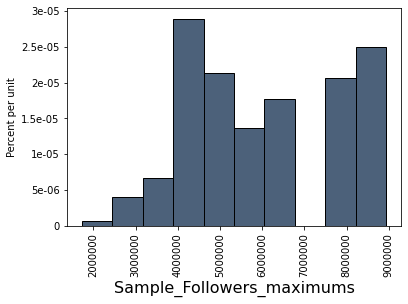

In [ ]:
Table().with_column('Sample_Followers_maximums', maximums).hist('Sample_Followers_maximums')

In [ ]:
Sample_Followers_maximum = df_English["Followers"].max()
Sample_Followers_maximum

8938903

# Bootstrap


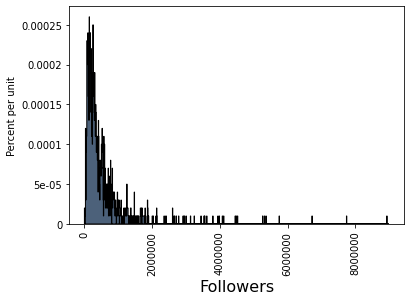

In [ ]:
sf_bins = np.arange(0, 9000000, 10000)
df.select('Followers').hist(bins=sf_bins)

**從上圖可知，追蹤數主要集中在0到2000000之間，因此挑選0到2000000做bootstrap，避免極端值**

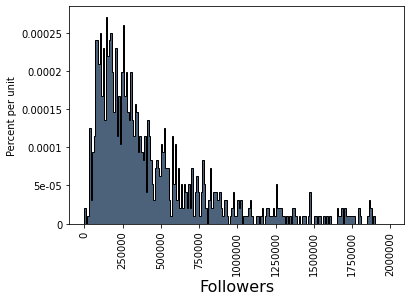

In [ ]:
df_twomillion = df.where('Followers', are.below(2000000))

sf_bins = np.arange(0, 2000000, 10000)
df_twomillion.select('Followers').hist(bins=sf_bins)

In [ ]:
pop_median = percentile(50, df_twomillion.column('Followers'))
pop_median

306435

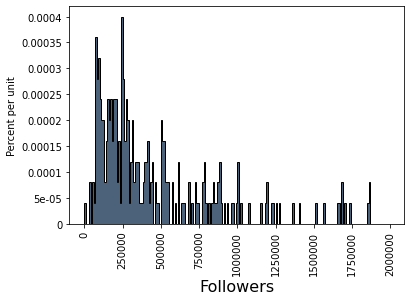

In [ ]:
our_sample = df_twomillion.sample(250, with_replacement=False)
our_sample.select('Followers').hist(bins=sf_bins)

In [ ]:
est_median = percentile(50, our_sample.column('Followers'))
est_median

299048

**resampled median**

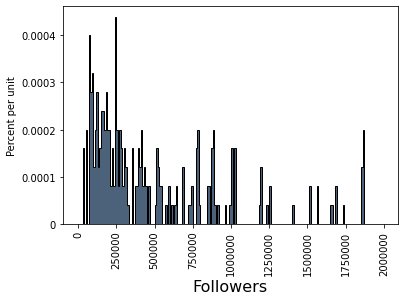

In [ ]:
resample_1 = our_sample.sample()
resample_1.select('Followers').hist(bins=sf_bins)

In [ ]:
resampled_median_1 = percentile(50, resample_1.column('Followers'))
resampled_median_1

285920

In [ ]:
def one_bootstrap_median():
    resampled_table = our_sample.sample()
    bootstrapped_median = percentile(50, resampled_table.column('Followers'))
    return bootstrapped_median

num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

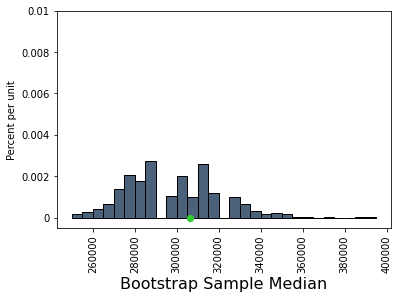

In [ ]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(250000, 400000, 5000)
resampled_medians.hist(bins = median_bins)

parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.0001)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [ ]:
left = percentile(2.5, bstrap_medians)
left

259624.0

In [ ]:
right = percentile(97.5, bstrap_medians)
right

346566.0

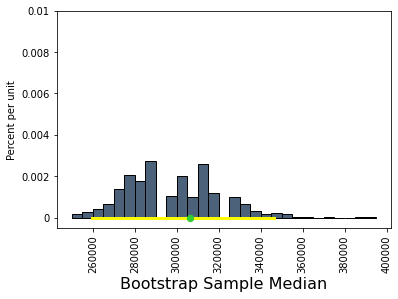

In [ ]:
resampled_medians.hist(bins = median_bins)

plots.ylim(-0.000005, 0.0001)
plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [ ]:
def bootstrap_median(original_sample, num_repetitions):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_median = percentile(50, new_bstrap_sample.column('Followers'))
        medians = np.append(medians, new_bstrap_median)
    return medians

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    original_sample = df_twomillion.sample(250, with_replacement=False)
    medians = bootstrap_median(original_sample, 500)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

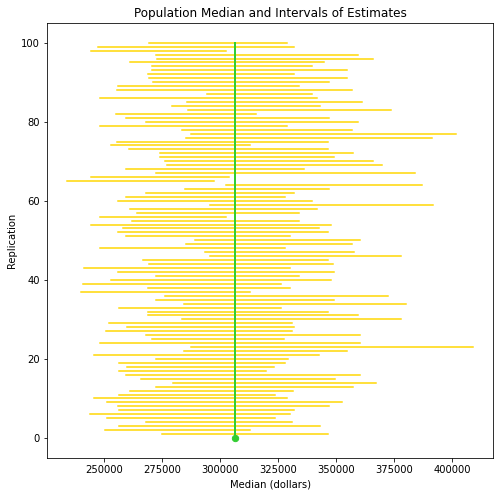

In [ ]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.plot(make_array(pop_median, pop_median), make_array(0, 100), color=parameter_green, lw=2)
plots.xlabel('Median (dollars)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');

In [ ]:
intervals

Left,Right
275174,346631
250709,312799
256353,342850
267948,330772
251416,323856
244207,330060
256448,331632
255944,346934
251416,352412
245715,328671
